In [1]:
#loading pandas package to load and clean the data
import pandas as pd
#importing libraries needed for regression and visualization
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf
import matplotlib.pylab as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/matplotlib/__init__.py:878: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))
`%matplotlib` prevents importing * from pylab and numpy


During this lab we will work with American community servey and crime data to establish and visualize relations between wealth, population and crime on different spatial scales, including county, state and city.

### Loading Demographics data (American Community Servey Data) obtained from the social explorer

In [2]:
demographics = pd.read_csv('data/acs2014/R11460953_SL050.csv')
demographics.head()

,Geo_FIPS,Geo_GEOID,Geo_NAME,Geo_QName,Geo_STUSAB,Geo_SUMLEV,Geo_GEOCOMP,Geo_FILEID,Geo_LOGRECNO,Geo_US,...,Geo_PUMA1,SE_T001_001,SE_T002_001,SE_T002_002,SE_T002_003,SE_T003_001,SE_T003_002,SE_T003_003,SE_T057_001,SE_T083_001
0,1001,05000US01001,"Autauga County, Alabama","Autauga County, Alabama",al,50,0,ACSSF,13,NaN,...,NaN,55136,55136,92.75346,594.436089,604.3882,594.4361,9.952067,52475,24644
1,1003,05000US01003,"Baldwin County, Alabama","Baldwin County, Alabama",al,50,0,ACSSF,14,NaN,...,NaN,191205,191205,120.27100,1589.784070,2027.3110,1589.7840,437.527200,50183,26851
2,1005,05000US01005,"Barbour County, Alabama","Barbour County, Alabama",al,50,0,ACSSF,15,NaN,...,NaN,27119,27119,30.64722,884.876304,904.5153,884.8763,19.638980,35634,17350
3,1007,05000US01007,"Bibb County, Alabama","Bibb County, Alabama",al,50,0,ACSSF,16,NaN,...,NaN,22653,22653,36.38555,622.582332,626.1689,622.5823,3.586525,37984,18110
4,1009,05000US01009,"Blount County, Alabama","Blount County, Alabama",al,50,0,ACSSF,17,NaN,...,NaN,57645,57645,89.40315,644.775905,650.6282,644.7759,5.852321,44409,20501


Selecting requisite data from the dataframe and renaming the columns

In [4]:
demographics.columns

Index([u'Geo_FIPS', u'Geo_GEOID', u'Geo_NAME', u'Geo_QName', u'Geo_STUSAB',
       u'Geo_SUMLEV', u'Geo_GEOCOMP', u'Geo_FILEID', u'Geo_LOGRECNO',
       u'Geo_US', u'Geo_REGION', u'Geo_DIVISION', u'Geo_STATECE', u'Geo_STATE',
       u'Geo_COUNTY', u'Geo_COUSUB', u'Geo_PLACE', u'Geo_PLACESE',
       u'Geo_TRACT', u'Geo_BLKGRP', u'Geo_CONCIT', u'Geo_AIANHH',
       u'Geo_AIANHHFP', u'Geo_AIHHTLI', u'Geo_AITSCE', u'Geo_AITS',
       u'Geo_ANRC', u'Geo_CBSA', u'Geo_CSA', u'Geo_METDIV', u'Geo_MACC',
       u'Geo_MEMI', u'Geo_NECTA', u'Geo_CNECTA', u'Geo_NECTADIV', u'Geo_UA',
       u'Geo_UACP', u'Geo_CDCURR', u'Geo_SLDU', u'Geo_SLDL', u'Geo_VTD',
       u'Geo_ZCTA3', u'Geo_ZCTA5', u'Geo_SUBMCD', u'Geo_SDELM', u'Geo_SDSEC',
       u'Geo_SDUNI', u'Geo_UR', u'Geo_PCI', u'Geo_TAZ', u'Geo_UGA',
       u'Geo_BTTR', u'Geo_BTBG', u'Geo_PUMA5', u'Geo_PUMA1', u'SE_T001_001',
       u'SE_T002_001', u'SE_T002_002', u'SE_T002_003', u'SE_T003_001',
       u'SE_T003_002', u'SE_T003_003', u'SE_T057_001', u

In [5]:
demographics = demographics[[ u'Geo_GEOID', u'Geo_NAME', u'Geo_QName', u'Geo_COUNTY',\
                             u'SE_T001_001', u'SE_T002_002', u'SE_T002_003', u'SE_T057_001', u'SE_T083_001']]

demographics.rename(columns={u'SE_T001_001' : 'Population',\
                             u'SE_T002_002' : 'Population Density', \
                             u'SE_T002_003' : 'Area',\
                             u'SE_T057_001' : 'Median household income',\
                             u'SE_T083_001' : 'Per capita income'}, inplace=True)

In [6]:
demographics.head()

,Geo_GEOID,Geo_NAME,Geo_QName,Geo_COUNTY,Population,Population Density,Area,Median household income,Per capita income
0,05000US01001,"Autauga County, Alabama","Autauga County, Alabama",1,55136,92.75346,594.436089,52475,24644
1,05000US01003,"Baldwin County, Alabama","Baldwin County, Alabama",3,191205,120.27100,1589.784070,50183,26851
2,05000US01005,"Barbour County, Alabama","Barbour County, Alabama",5,27119,30.64722,884.876304,35634,17350
3,05000US01007,"Bibb County, Alabama","Bibb County, Alabama",7,22653,36.38555,622.582332,37984,18110
4,05000US01009,"Blount County, Alabama","Blount County, Alabama",9,57645,89.40315,644.775905,44409,20501


In [7]:
#extract state number for future use
demographics['Geo_STATE']=demographics['Geo_GEOID'].apply(lambda x: x[-5:-3])

In [8]:
demographics.head()

,Geo_GEOID,Geo_NAME,Geo_QName,Geo_COUNTY,Population,Population Density,Area,Median household income,Per capita income,Geo_STATE
0,05000US01001,"Autauga County, Alabama","Autauga County, Alabama",1,55136,92.75346,594.436089,52475,24644,01
1,05000US01003,"Baldwin County, Alabama","Baldwin County, Alabama",3,191205,120.27100,1589.784070,50183,26851,01
2,05000US01005,"Barbour County, Alabama","Barbour County, Alabama",5,27119,30.64722,884.876304,35634,17350,01
3,05000US01007,"Bibb County, Alabama","Bibb County, Alabama",7,22653,36.38555,622.582332,37984,18110,01
4,05000US01009,"Blount County, Alabama","Blount County, Alabama",9,57645,89.40315,644.775905,44409,20501,01


In [9]:
#check the total population in the data
sum(demographics.Population)

317746049

In [10]:
#add cumulative city income
demographics['Income']=demographics.Population*demographics['Per capita income']

### Loading crime data (FBI 2014 estimates) obtained from social explorer

In [11]:
crime2014 = pd.read_csv('data/crime2014/R11460954_SL050.csv')
crime2014.head()

,Geo_FIPS,Geo_NAME,Geo_QNAME,Geo_STATE,Geo_COUNTY,SE_T001_001,SE_T002_001,SE_T002_002,SE_T002_003,SE_T003_001,...,SE_T006_001,SE_T006_002,SE_T006_003,SE_T006_004,SE_T007_001,SE_T007_002,SE_T007_003,SE_T007_004,SE_T008_001,SE_T009_001
0,01001,Autauga County,"Autauga County, Alabama",1,001,55395.0,482,68,414,870.114631,...,414,170.0,199.0,45.0,747.359870,306.886903,359.238198,81.234768,NaN,NaN
1,01003,Baldwin County,"Baldwin County, Alabama",1,003,200111.0,760,98,662,379.789217,...,662,230.0,405.0,27.0,330.816397,114.936210,202.387675,13.492512,NaN,NaN
2,01005,Barbour County,"Barbour County, Alabama",1,005,26887.0,145,17,128,539.294083,...,128,68.0,55.0,5.0,476.066501,252.910328,204.559824,18.596348,NaN,NaN
3,01007,Bibb County,"Bibb County, Alabama",1,007,22506.0,86,4,82,382.120323,...,82,42.0,34.0,6.0,364.347285,186.616902,151.070826,26.659557,NaN,NaN
4,01009,Blount County,"Blount County, Alabama",1,009,57719.0,1013,90,923,1755.054661,...,923,311.0,524.0,88.0,1599.126804,538.817374,907.846636,152.462794,NaN,NaN


In [12]:
crime2014.columns

Index([u'Geo_FIPS', u'Geo_NAME', u'Geo_QNAME', u'Geo_STATE', u'Geo_COUNTY',
       u'SE_T001_001', u'SE_T002_001', u'SE_T002_002', u'SE_T002_003',
       u'SE_T003_001', u'SE_T003_002', u'SE_T003_003', u'SE_T004_001',
       u'SE_T004_002', u'SE_T004_003', u'SE_T004_004', u'SE_T004_005',
       u'SE_T004_006', u'SE_T005_001', u'SE_T005_002', u'SE_T005_003',
       u'SE_T005_004', u'SE_T005_005', u'SE_T005_006', u'SE_T006_001',
       u'SE_T006_002', u'SE_T006_003', u'SE_T006_004', u'SE_T007_001',
       u'SE_T007_002', u'SE_T007_003', u'SE_T007_004', u'SE_T008_001',
       u'SE_T009_001'],
      dtype='object')

In [13]:
crime2014.rename(columns = { u'SE_T001_001' : 'Population',\
                             u'SE_T002_001' : 'Crimes',\
                          u'SE_T002_002' : 'Violent Crimes', \
                          u'SE_T002_003' : 'Property Crimes' }, inplace=True)

crime2014 = crime2014[[u'Geo_FIPS', u'Geo_NAME', u'Geo_QNAME', u'Geo_STATE', u'Geo_COUNTY', 'Population', 'Crimes' , 'Violent Crimes', 'Property Crimes']]

In [14]:
#the dataset does not cover entire country
sum(crime2014.Population)

250424654.0

In [15]:
crime2014.head()

,Geo_FIPS,Geo_NAME,Geo_QNAME,Geo_STATE,Geo_COUNTY,Population,Crimes,Violent Crimes,Property Crimes
0,01001,Autauga County,"Autauga County, Alabama",1,001,55395.0,482,68,414
1,01003,Baldwin County,"Baldwin County, Alabama",1,003,200111.0,760,98,662
2,01005,Barbour County,"Barbour County, Alabama",1,005,26887.0,145,17,128
3,01007,Bibb County,"Bibb County, Alabama",1,007,22506.0,86,4,82
4,01009,Blount County,"Blount County, Alabama",1,009,57719.0,1013,90,923


#### Merging dataframes on GeoID (GeoID is used to uniquely identify a geographical location by the census bureau) for further analysis where crime and demographics are needed together

In [16]:
demographics['Geo_FIPS'] = demographics.Geo_GEOID.apply(lambda x: x[-5:]) #ensure consistent formatting of the geo id
df = pd.merge(demographics, crime2014, on='Geo_FIPS', how='inner') 
df.head()

,Geo_GEOID,Geo_NAME_x,Geo_QName,Geo_COUNTY_x,Population_x,Population Density,Area,Median household income,Per capita income,Geo_STATE_x,Income,Geo_FIPS,Geo_NAME_y,Geo_QNAME,Geo_STATE_y,Geo_COUNTY_y,Population_y,Crimes,Violent Crimes,Property Crimes
0,05000US01001,"Autauga County, Alabama","Autauga County, Alabama",1,55136,92.75346,594.436089,52475,24644,01,1358771584,01001,Autauga County,"Autauga County, Alabama",1,001,55395.0,482,68,414
1,05000US01003,"Baldwin County, Alabama","Baldwin County, Alabama",3,191205,120.27100,1589.784070,50183,26851,01,5134045455,01003,Baldwin County,"Baldwin County, Alabama",1,003,200111.0,760,98,662
2,05000US01005,"Barbour County, Alabama","Barbour County, Alabama",5,27119,30.64722,884.876304,35634,17350,01,470514650,01005,Barbour County,"Barbour County, Alabama",1,005,26887.0,145,17,128
3,05000US01007,"Bibb County, Alabama","Bibb County, Alabama",7,22653,36.38555,622.582332,37984,18110,01,410245830,01007,Bibb County,"Bibb County, Alabama",1,007,22506.0,86,4,82
4,05000US01009,"Blount County, Alabama","Blount County, Alabama",9,57645,89.40315,644.775905,44409,20501,01,1181780145,01009,Blount County,"Blount County, Alabama",1,009,57719.0,1013,90,923


In [17]:
#select filed needed for the analysis
df=df[['Population_x','Area','Crimes','Violent Crimes','Property Crimes','Income', 'Per capita income']]
df.rename(columns = { 'Population_x' : 'Population' }, inplace=True)
df.head()

,Population,Area,Crimes,Violent Crimes,Property Crimes,Income,Per capita income
0,55136,594.436089,482,68,414,1358771584,24644
1,191205,1589.784070,760,98,662,5134045455,26851
2,27119,884.876304,145,17,128,470514650,17350
3,22653,622.582332,86,4,82,410245830,18110
4,57645,644.775905,1013,90,923,1181780145,20501


## Q1. Relations between Crime, Wealth and Density (county-level)

Q11. Run a linear regression of total Crime and total Income against population (without intercept). Visulize the data (scatter plots) and regression fit

Q12. Analyze correlations between income per capita, population density, crime per capita, fraction of violent crime

## Q2 Visualize characteristics of states
### Q2.1 Visualize income and population density per state

Aggregate demographics data per state

In [18]:
states = demographics.groupby(by='Geo_STATE').sum().loc[:,[u'Population', u'Area', \
                                                 u'Income']]

states.reset_index(inplace=True)

In [19]:
states.head()

,Geo_STATE,Population,Area,Income
0,01,4817678,50645.326381,115316134026
1,02,728300,570640.949601,24128028977
2,04,6561516,113594.083902,167558784896
3,05,2947036,52035.476971,66589385271
4,06,38066920,155779.218854,1138429083472


In [20]:
#function for vusualizing spatial data (heatmap)
#import libraries for handing shapefiles
import shapefile as shp
from shapely.geometry.polygon import Polygon
from descartes import PolygonPatch

sf = shp.Reader('data/USA_adm/USA_states_reduced.shp')
sf_records=sf.records()
sf_shape=sf.shapeRecords()

#for plotting our result
def plot_spatial_distribution(x,t,logscale,n=200):
    # x - quantity to visualize, t - title, n - color granularity
    center=[]
    cmap = plt.cm.cool(np.linspace(0,1,n+1))
    
    if logscale:
      v2=np.log(max(x))
      v1=np.log(min(x))
    else:
      v2=max(x)
      v1=min(x)

    fig = plt.figure(figsize = (15,10)) 
    ax = fig.gca() 
    for s in range(0,len(sf_records)):
            v = x[s]
            if logscale:
              k = int((np.log(v)-v1)/(v2-v1)*n) # for the log-scale
            else:
              k = int(1.0*(v-v1)/(v2-v1)*n)
            c=cmap[k][0:3]

            shape=sf_shape[s]
            x_ = [i[0] for i in shape.shape.points[:]]
            y_ = [i[1] for i in shape.shape.points[:]]
            poly=Polygon(zip(x_,y_))
            temp=[poly.centroid.x,poly.centroid.y,k]
            center.append(temp)

            ax.add_patch(PolygonPatch(poly, fc=c,ec="k", alpha=1, zorder=2 ))
    center=pd.DataFrame(center)
    center.columns=["x","y","z"]
    sc = plt.scatter(center.x, center.y,c=list(center.z),cmap=plt.cm.cool)
    #plt.colorbar(sc)
    plt.title("Spatial distribution of "+t)
    plt.show()

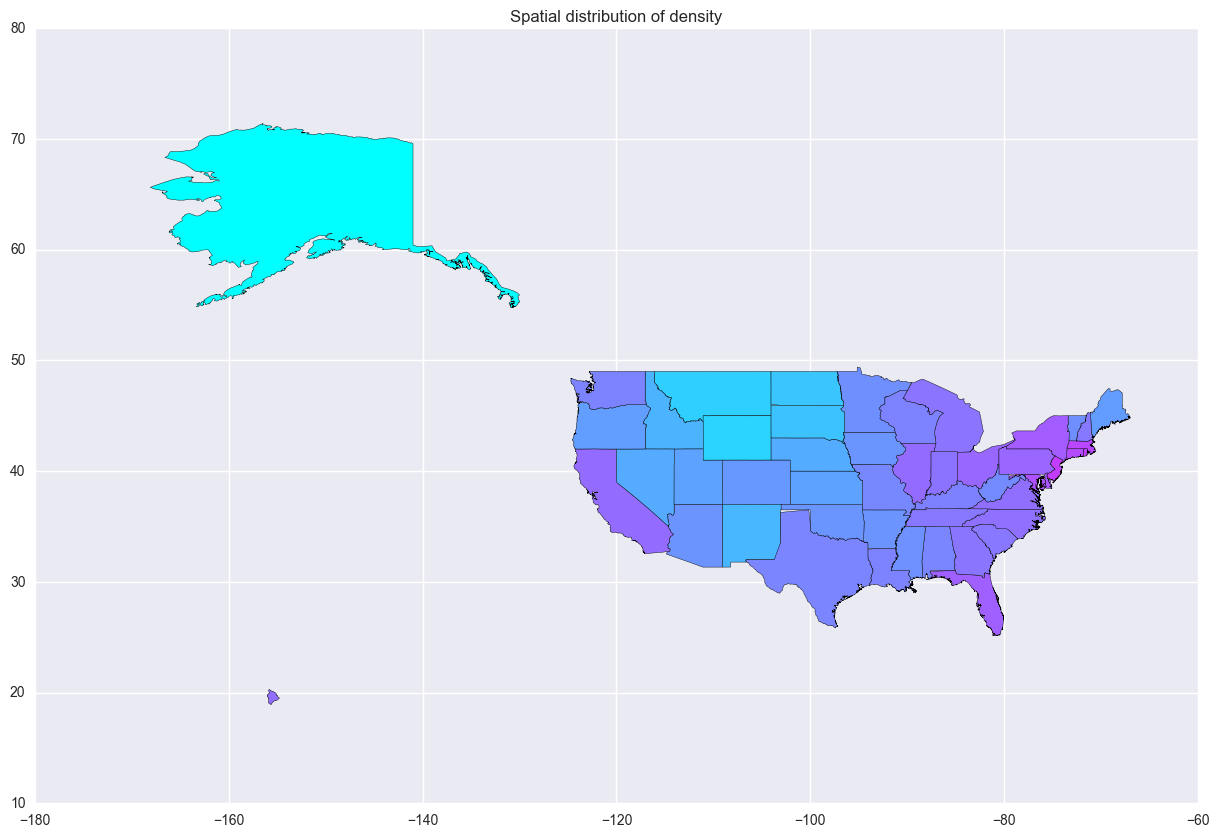

In [21]:
Density=states.Population/states.Area
plot_spatial_distribution(Density,'density',1)

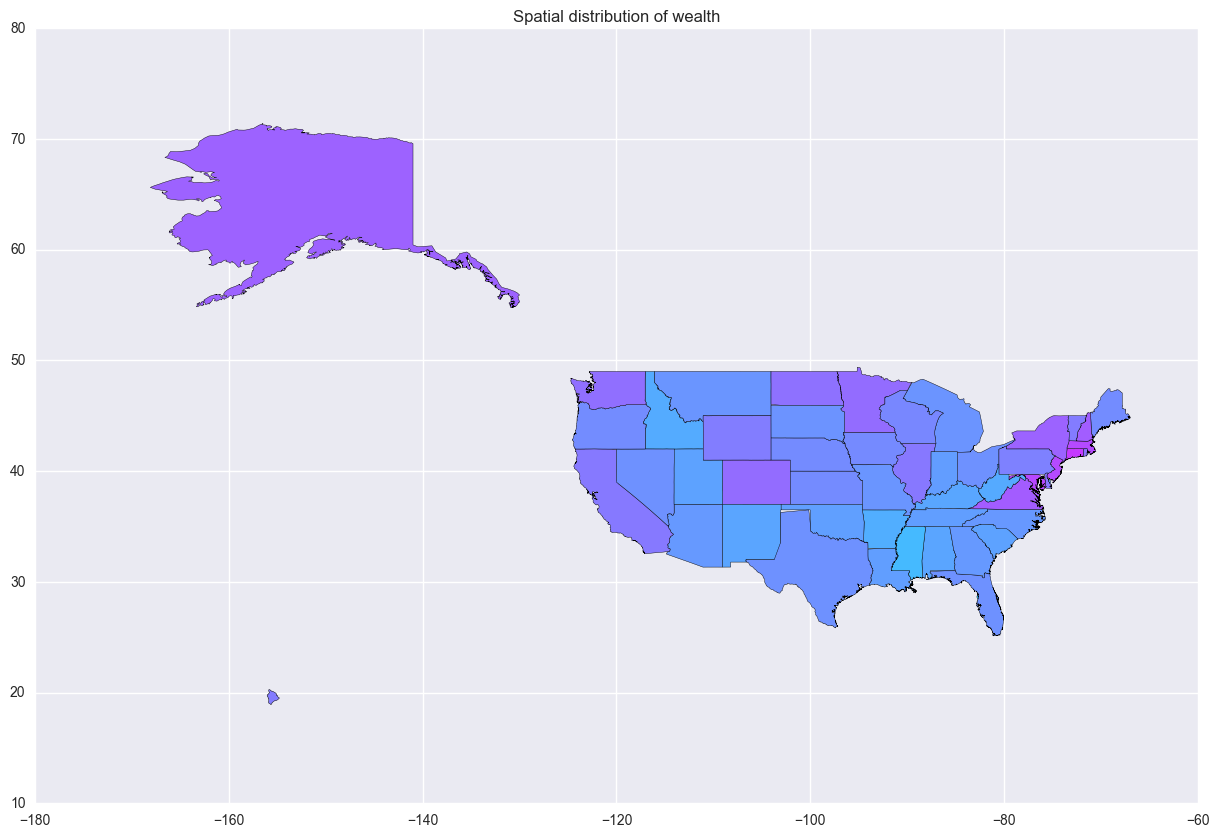

In [22]:
Wealth=states.Income/states.Population
plot_spatial_distribution(Wealth,'wealth',0)

### Q2.2. Report top 5 and last 5 states by population density and income per capita

### Q2.3. Compute and visualize crime per capita and fraction of violent crimes per state. Report top and last 5 states in each

## Q3 Urban scaling laws

### Q3.1. Aggregate demographics and crime by MSA (separately)

In [23]:
msa = pd.read_csv('data/msalist.csv')
msa.head()

,msa,msa_name,Geo_FIPS,county
0,10180,"Abilene, TX (Metropolitan Statistical Area)",48059,"Callahan, TX"
1,10180,"Abilene, TX (Metropolitan Statistical Area)",48253,"Jones, TX"
2,10180,"Abilene, TX (Metropolitan Statistical Area)",48441,"Taylor, TX"
3,10420,"Akron, OH (Metropolitan Statistical Area)",39133,"Portage, OH"
4,10420,"Akron, OH (Metropolitan Statistical Area)",39153,"Summit, OH"


### Q3.2. Establish a scaling relationship $Y\sim C X^q$ between total income and population. Visualize on the log scale. Does $q=1$ fall into the confidence interval?  

### Q3.3. Find the top 5 cities overperforming and underperforming cities by income (by log-scale difference from the trend)

### Q3.4.Establish a scaling relationship $Y\sim C X^q$ between total, violent and property crime vs population. Visualize on the log scale. Does $q=1$ fall into the confidence interval? Find top 5 and last 5 cities by crime 

### Q3.5. Is there any relationship between residual by wealth and residual by crime?